In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
#import copy
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
import math
import statsmodels.api as sm
rcParams['figure.figsize']=20,10


In [2]:
agn = pd.read_csv(r"C:\Users\USER\Downloads\mjd_flux.csv",index_col='MJD',  engine='python')
                  

print (agn)


                      FLUX
MJD                       
54687.650035  2.936060e-07
54697.650035  2.990764e-07
54707.650035  3.131870e-07
54717.650035  2.844194e-07
54727.650035  2.098870e-07
54737.650035  1.672738e-07
54747.650035  1.960539e-07
54757.650035  2.394797e-07
54767.650035  1.985633e-07
54777.650035  1.695844e-07
54787.650035  1.497280e-07
54797.650035  2.211467e-07
54807.650035  1.102227e-07
54817.650035  1.401186e-07
54827.650035  1.045945e-07
54837.650035  2.198002e-07
54847.650035  1.088787e-07
54857.650035  4.575230e-08
54867.650035  1.301275e-07
54877.650035  1.130000e-07
54887.650035  1.933408e-07
54897.650035  2.083976e-07
54907.650035  1.998121e-07
54917.650035  2.625811e-07
54927.650035  1.697973e-07
54937.650035  2.133895e-07
54947.650035  2.356131e-07
54957.650035  2.127461e-07
54967.650035  2.738501e-07
54977.650035  1.848963e-07
...                    ...
57897.650035  2.224096e-07
57907.650035  5.566139e-07
57917.650035  1.076260e-06
57927.650035  8.601594e-07
5

In [54]:
def fig(data,window_size, figsize=(20, 10),color="green",linestyle="",xlabel="MJD",ylabel="Total arrivals",title=None,heading='Flux Variation with time'):
    plt.figure(figsize=figsize)
    plt.plot(data, color=color, label=heading)
    movingAverage=data.rolling(window=window_size).mean()
    movingstd=data.rolling(window=window_size).std()
    print ('Mean : ' + str(np.mean(movingAverage)))
    print ('STD : ' + str(np.mean(movingstd)))
    plt.plot(movingAverage,color='red',label='Rolling mean')
    plt.plot(movingstd,color='blue',label='Rolling std')
    plt.xlabel(xlabel,size = 20)
    plt.ylabel(ylabel, size=18)
    plt.legend(loc=2)
    plt.title(title)

    plt.show(block=False)

        
def pacf_acf(data,figsize=(20, 10),linestyle="-",title=None):
    plt.figure(figsize=figsize)
    #plotting Autocorrelation function over 25 lags
    #ACF gives "Indirect correlation" between correlated data points
    plot_acf(data, lags=25,title = 'Autocorrelation')
    #plotting Partial Auto correlation function over 25 lags
    #PACF gives actual direct correlation between correlated data points.
    plot_pacf(data, lags=25, title = 'Partial Autocorrelation')
    
def inverse_difference(last_ob, value):
	return value + last_ob   

Mean : FLUX    3.557501e-07
dtype: float64
STD : FLUX    1.119145e-07
dtype: float64


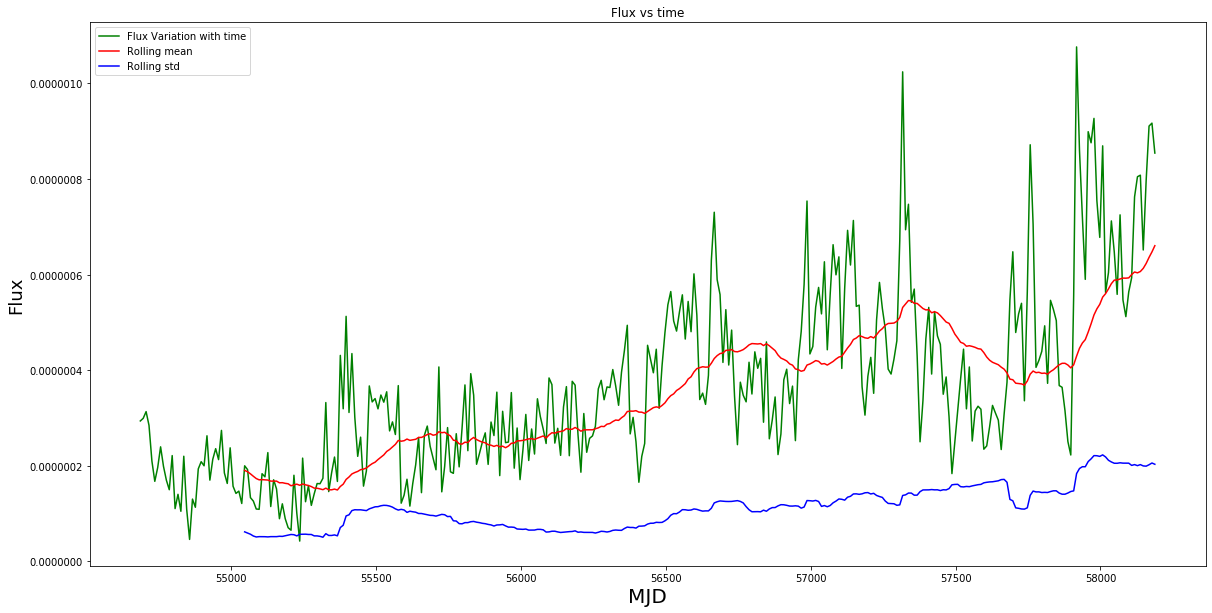

In [40]:
# ...................Initial Time Series....................
show_plot(agn,window_size=37,ylabel="Flux x $10^{-6}$ $(Ph/cm^{2}/sec)$",title='Flux vs time',heading='Flux Variation with time') 


<Figure size 1440x720 with 0 Axes>

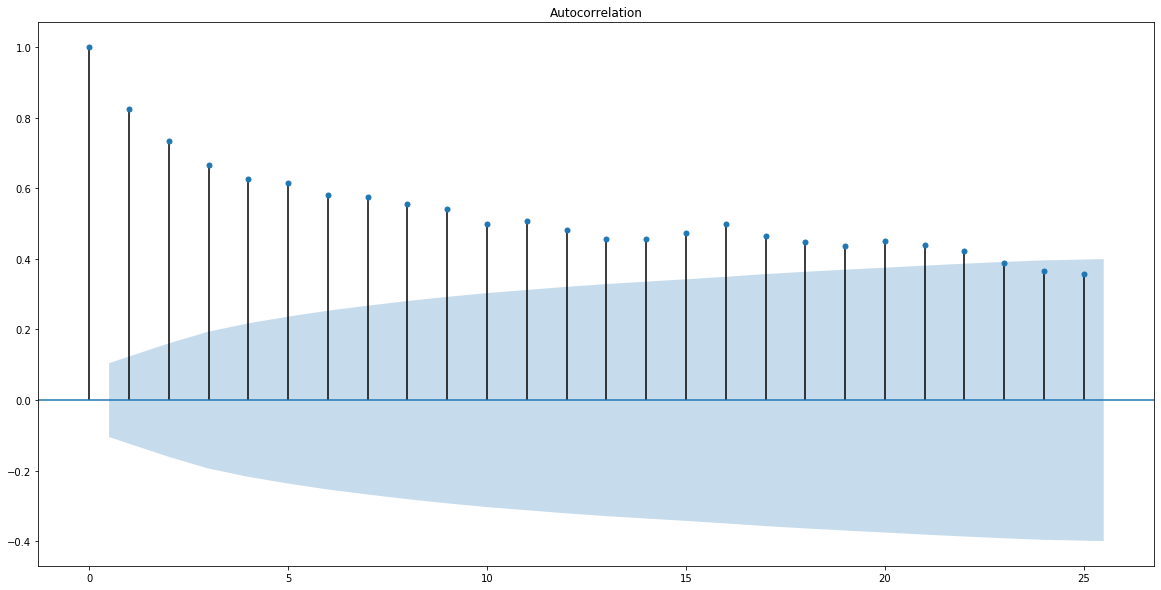

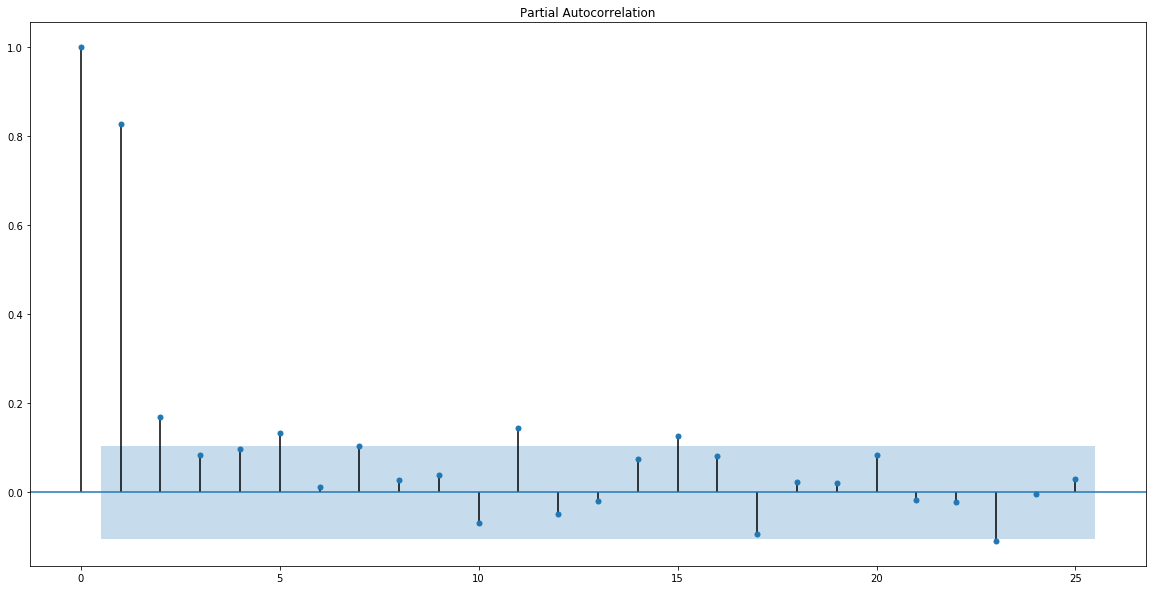

In [74]:
pacf_acf(agn,figsize=(20, 10),linestyle="-",title=None)


In [73]:
# Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey fuller test')
dftest = adfuller(agn['FLUX'], autolag='AIC')

dfout = pd.Series(dftest[0:4], index =['test statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfout['Critical value(%s)'%key] = value
    if (dfout[1] <= 0.05):
        print ("Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root . Indicating it is NOT STATIONARY")
     
print(dfout)

Result of Dickey fuller test
Weak evidence against null hypothesis, time series has a unit root . Indicating it is NOT STATIONARY
Weak evidence against null hypothesis, time series has a unit root . Indicating it is NOT STATIONARY
Weak evidence against null hypothesis, time series has a unit root . Indicating it is NOT STATIONARY
test statistics                 -0.846661
p-value                          0.805030
#Lags Used                      16.000000
Number of Observations Used    334.000000
Critical value(1%)              -3.450081
Critical value(5%)              -2.870233
Critical value(10%)             -2.571401
dtype: float64


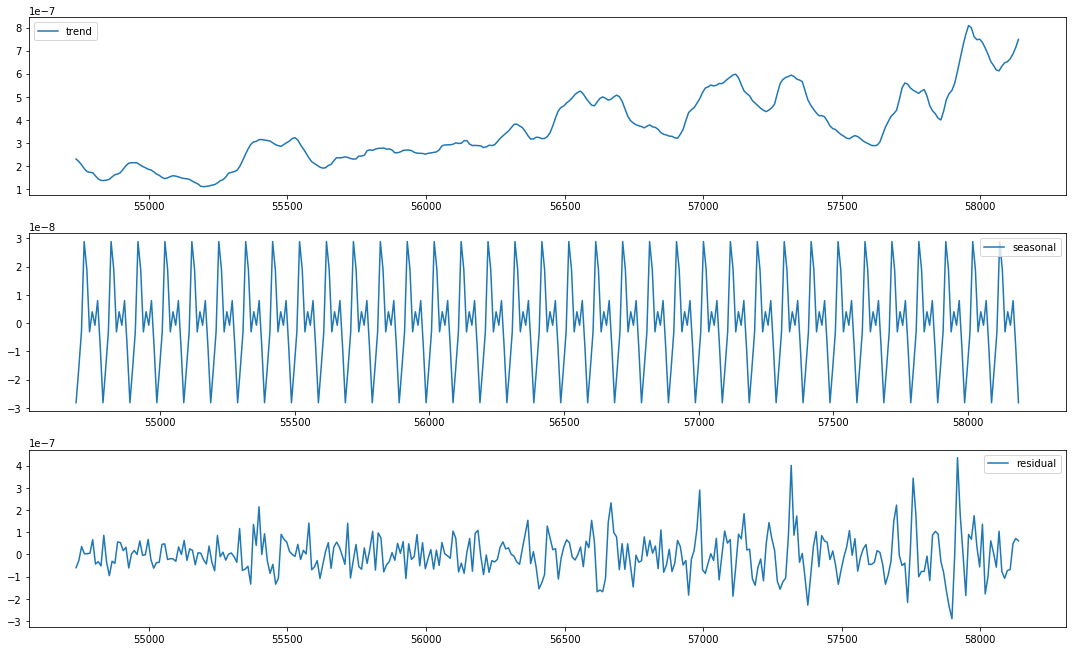

In [88]:
#Decomposing the component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(agn, model='additive',freq=10)
trend_data= (decomposition.trend.dropna())
seasonal_data= (decomposition.seasonal.dropna())
resid_data = (decomposition.resid.dropna())

#Plotting the decomposed component

plt.figure(figsize=(15,12))

plt.subplot(412)
plt.plot(trend_data, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_data, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid_data, label='residual')
plt.legend(loc='best')
plt.tight_layout()


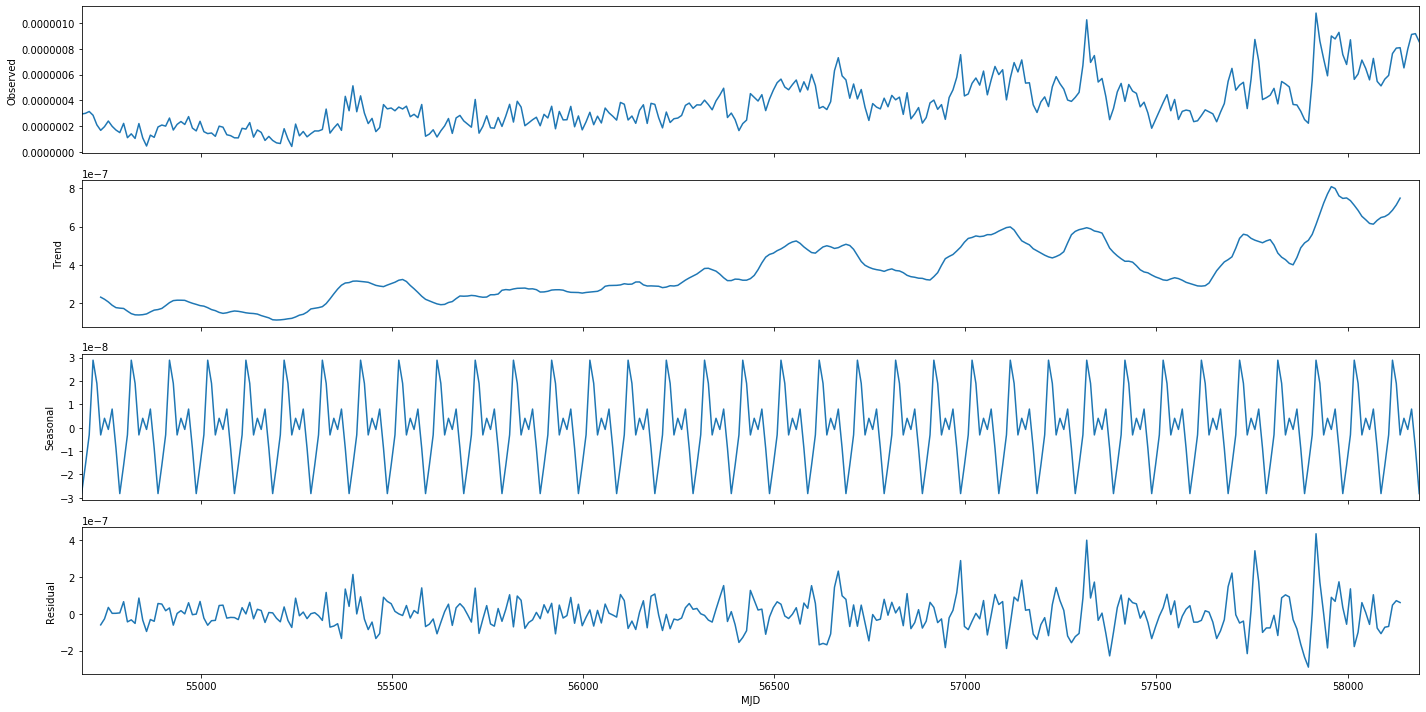

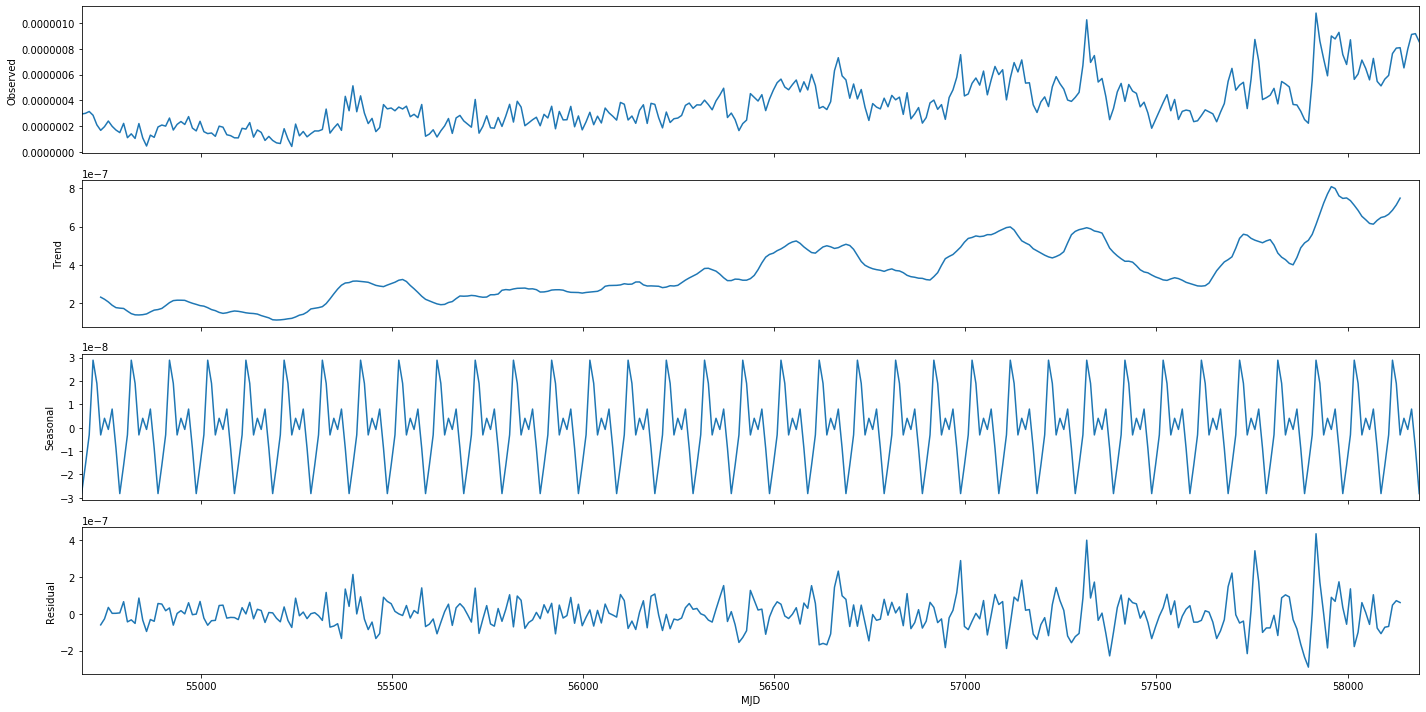

In [89]:
decomposition.plot()

In [90]:
#Preparing the data frame for subtraction
agn_lc_1=agn.drop(agn.index[:5])
agn_lc_1=agn_lc_1.drop(agn_lc_1.index[341:])


In [91]:
# Subtracting residue from the agn to get data without residue
agn_lc_2=agn_lc_1.sub(resid_data)  
agn_lc_2.head()

,FLUX
MJD,
54737.650035,2.268360e-07
54747.650035,2.228648e-07
54757.650035,2.040515e-07
54767.650035,1.954021e-07
54777.650035,1.661525e-07


In [110]:
#..................Differencing Method to make series stationary.............
diff = agn_lc_2.diff()
diff = (diff.dropna())

Mean : FLUX    1.451739e-09
dtype: float64
STD : FLUX    2.188918e-08
dtype: float64


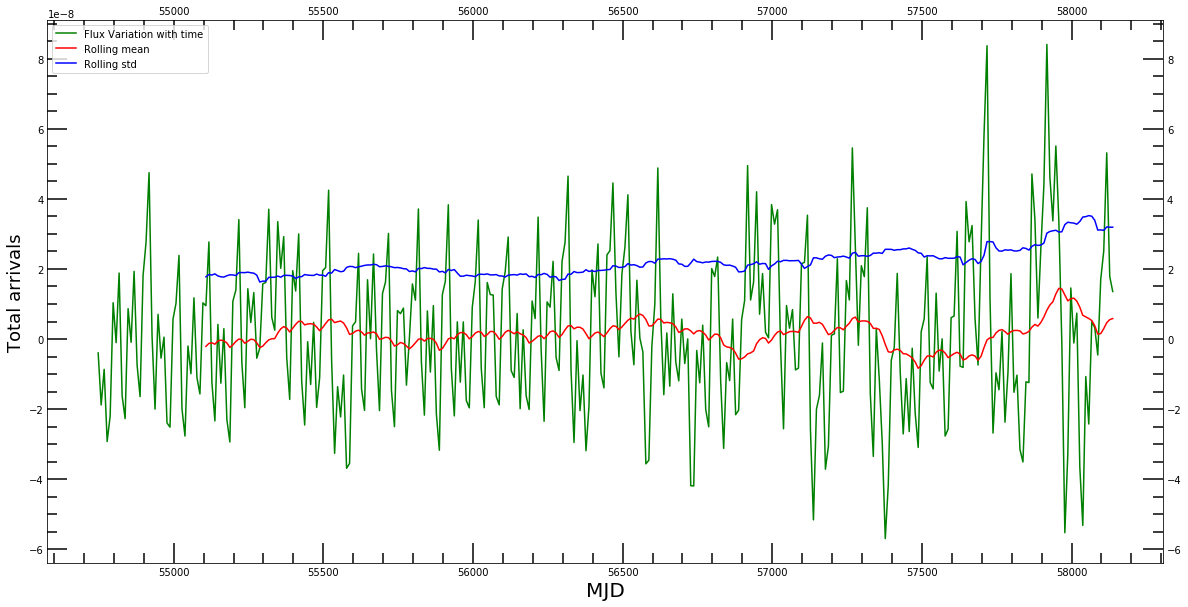

<Figure size 1440x720 with 0 Axes>

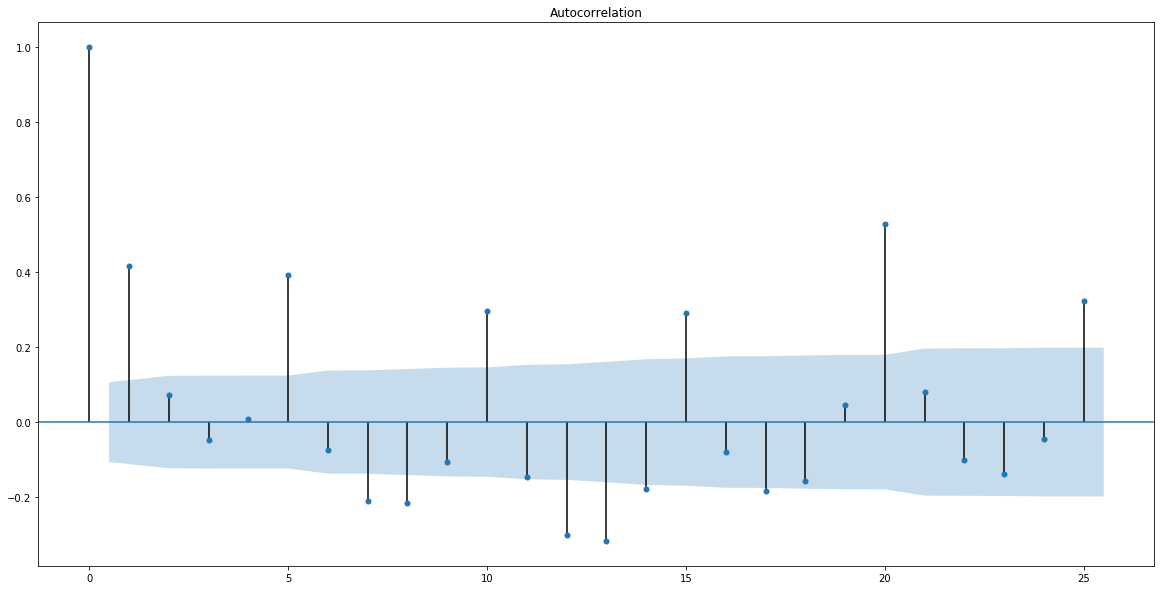

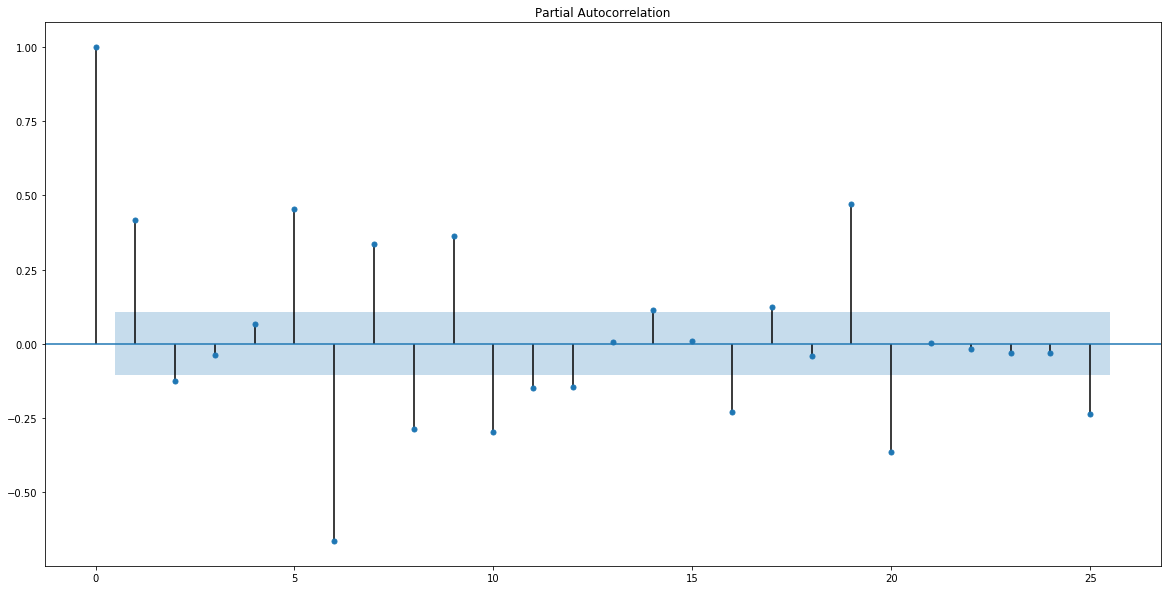

In [107]:
#Checking for Stationarity of Transformed data
show_plot(diff,37, figsize=(20, 10),linestyle="",title=None,heading='Flux Variation with time')
pacf_acf(diff,figsize=(20, 10),linestyle="-",title=None)


In [105]:
# Dickey Fuller test of Transformed data
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey fuller test')
dftest = adfuller(diff['FLUX'], autolag='AIC')

dfout = pd.Series(dftest[0:4], index =['test statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfout['Critical value(%s)'%key] = value
    if (dfout[1] <= 0.05):
        print ("Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root . Indicating it is NOT STATIONARY")
     
print(dfout)

Result of Dickey fuller test
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY
test statistics               -6.232511e+00
p-value                        4.914246e-08
#Lags Used                     1.500000e+01
Number of Observations Used    3.240000e+02
Critical value(1%)            -3.450695e+00
Critical value(5%)            -2.870502e+00
Critical value(10%)           -2.571545e+00
dtype: float64


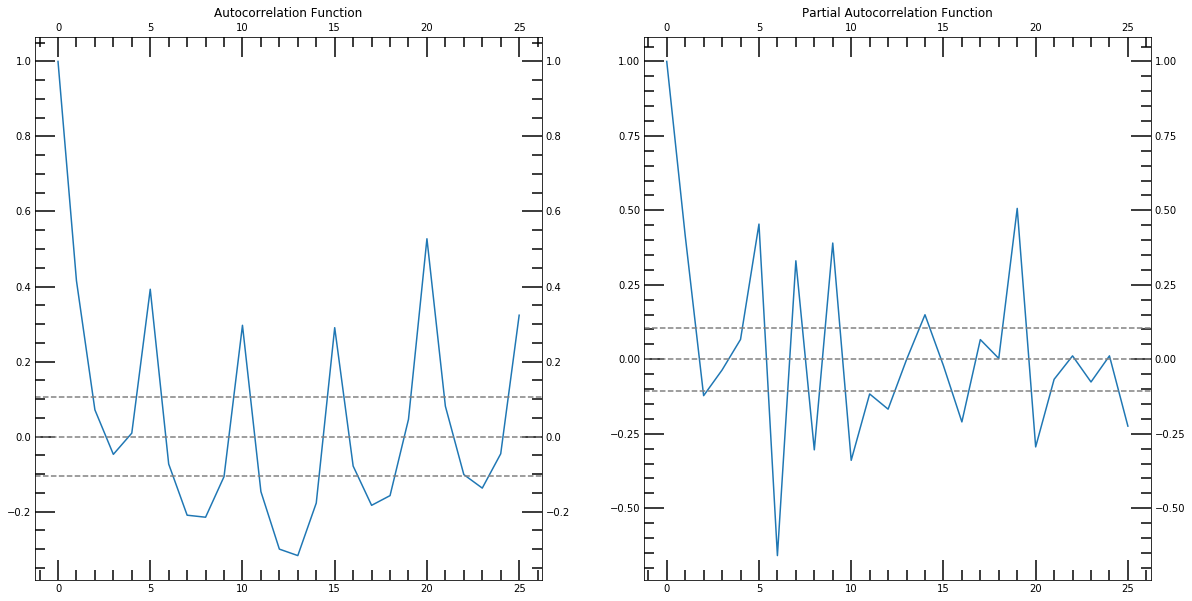

In [118]:
# ARIMA MODELLING. 
# =============================================================================

# ===============Determining P and Q value for ARIMA Modelling==============================================================

lag_acf=acf(diff,nlags=25)
lag_pacf=pacf(diff,nlags=25,method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.tick_params(axis='both', left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='on', labelbottom='on', size=20, width=1.5, direction='in')
plt.minorticks_on()
plt.tick_params(left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', width=1.5, size=10, which='minor', direction='in', color='k')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.tick_params(axis='both', left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='on', labelbottom='on', size=20, width=1.5, direction='in')
plt.minorticks_on()
plt.tick_params(left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', width=1.5, size=10, which='minor', direction='in', color='k')
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
# P =2 Q=2 d =1

In [120]:
# FITTING ARIMA Model on our Data
# =============================================================================

model = ARIMA(agn_lc_2,order=(2,1,2))
results_arima = model.fit(disp=1)
print (results_arima.summary())
print (results_arima.aic)


                             ARIMA Model Results                              
Dep. Variable:                 D.FLUX   No. Observations:                  340
Model:                 ARIMA(2, 1, 2)   Log Likelihood                5417.635
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 17 Mar 2021   AIC                         -10823.270
Time:                        11:45:43   BIC                         -10800.297
Sample:                             1   HQIC                        -10814.116
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.527e-09   3.72e-08      0.041      0.967   -7.13e-08    7.43e-08
ar.L1.D.FLUX     0.0884        nan        nan        nan         nan         nan
ar.L2.D.FLUX    -0.0513      0.049     -1.03

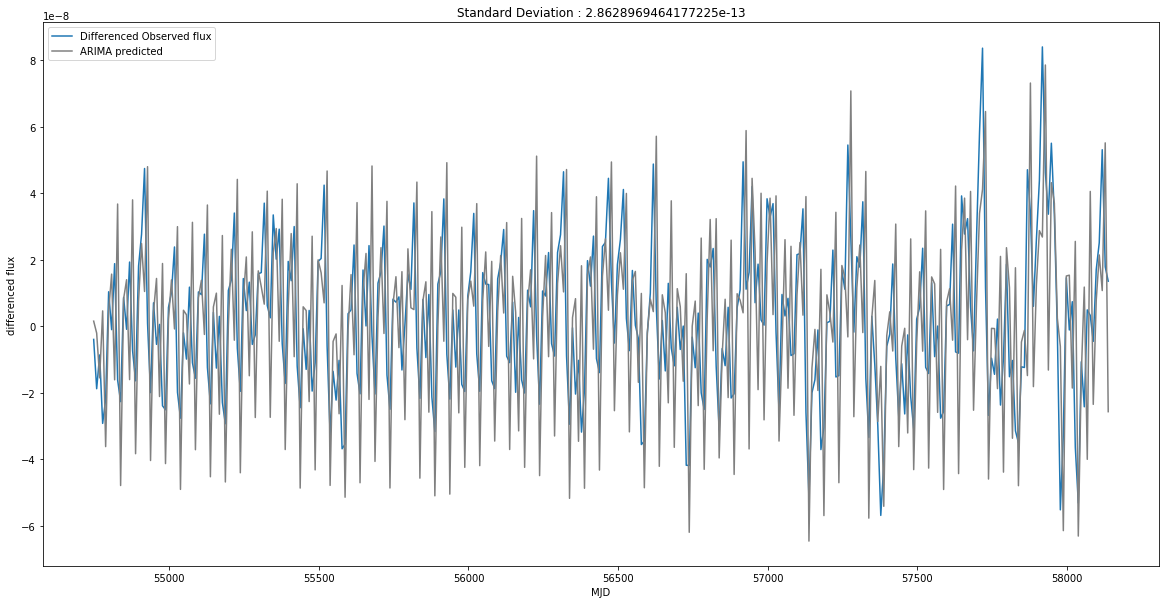

In [125]:
#PLotting the predicted differenced and original differenced series
plt.plot(diff,label='Differenced Observed flux')
plt.plot(results_arima.fittedvalues,color='gray', label='ARIMA predicted')
plt.title('Standard Deviation : ' + str(sum(((results_arima.fittedvalues.subtract(diff['FLUX'],fill_value=0.00000)).values)**2)))
plt.xlabel('MJD')
plt.ylabel('differenced flux')
plt.legend(loc='best')
plt.show()


MJD
54747.650035    1.526843e-09
54757.650035   -2.069561e-09
54767.650035   -1.554420e-08
54777.650035    4.615979e-09
54787.650035   -3.623532e-08
dtype: float64


In [143]:
agn

,FLUX
MJD,
54687.650035,2.936060e-07
54697.650035,2.990764e-07
54707.650035,3.131870e-07
54717.650035,2.844194e-07
54727.650035,2.098870e-07
54737.650035,1.672738e-07
54747.650035,1.960539e-07
54757.650035,2.394797e-07
54767.650035,1.985633e-07


In [131]:
# Regenerating our series  from differenced sum
predictions_ARIMA_diff=pd.Series(results_arima.fittedvalues,copy=True)
predicted_data=(predictions_ARIMA_diff.cumsum())+ ((agn.iloc[0]))
predicted_data=(predictions_ARIMA_diff.cumsum())+ ((agn.iloc[0]['FLUX']))


[7.78063008e-07 7.97374509e-07 7.98906368e-07 7.99521866e-07
 8.00967873e-07 8.02534292e-07]


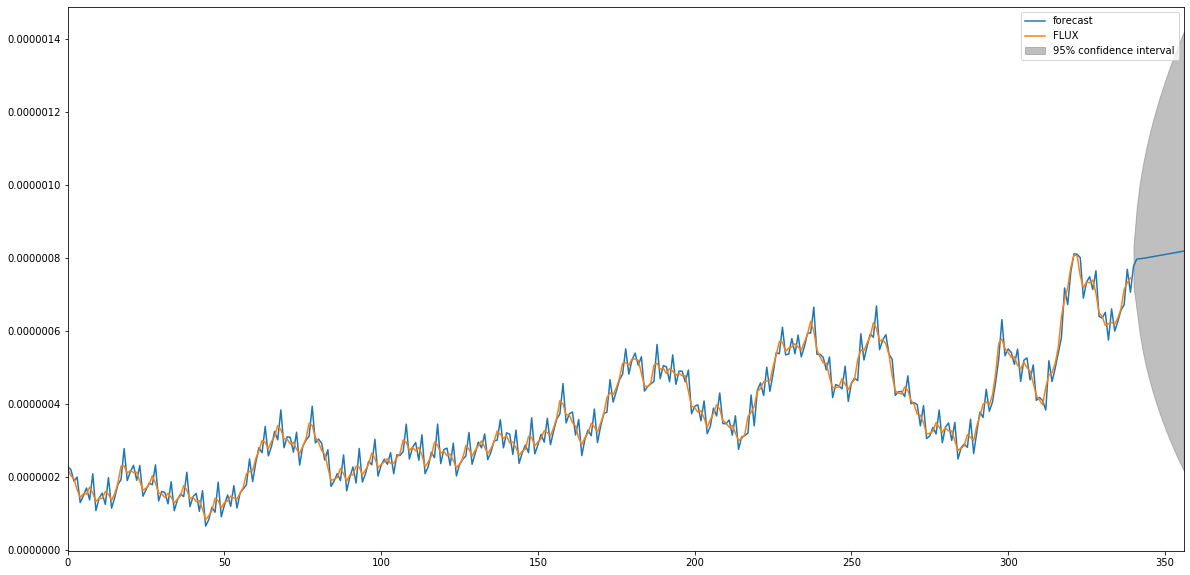

In [146]:
#Predicting the flux for next 400 days
results_arima.plot_predict(1,357)
print ((results_arima.forecast(steps=6))[0])
plt.show()


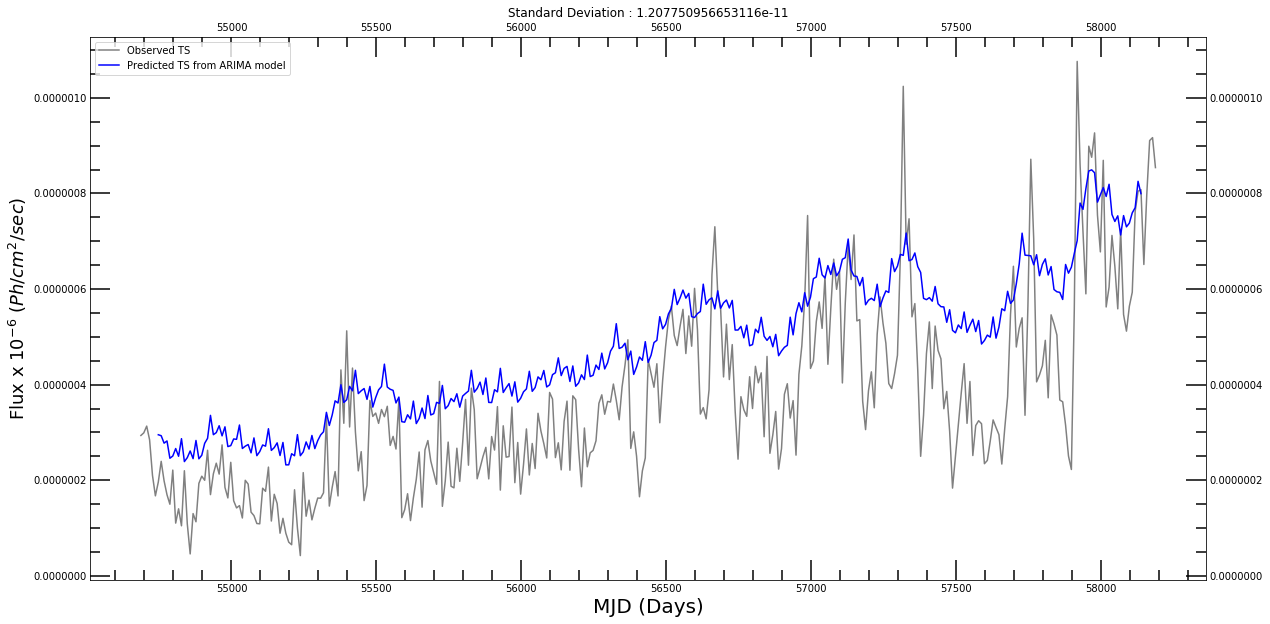

In [147]:
#PLOTTING THE INITIAL TIME SERIES AND THE TS FROM ARIMA MODEL
plt.plot(agn,color='gray', label='Observed TS')
plt.plot(predicted_data,color='blue', label='Predicted TS from ARIMA model')
plt.xlabel('MJD (Days)', size=20)
plt.ylabel('Flux x $10^{-6}$ $(Ph/cm^{2}/sec)$', size = 18)
# plt.title('Standard Deviation : ' +str(sum(((predicted_data.subtract(agn_lc,fill_value=0.00000)).values)**2)))
plt.title('Standard Deviation : ' +str(sum(((predicted_data.subtract(agn['FLUX'],fill_value=0.00000)).values)**2)))

plt.legend(loc='best')
plt.tick_params(axis='both', left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', size=20, width=1.5, direction='in')
plt.minorticks_on()
plt.tick_params(left='on', top='off', right='off', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', width=1.5, size=10, which='minor', direction='in', color='k')
plt.show(block=False) 
plt.show()


TypeError: float() argument must be a string or a number, not 'AxesSubplot'

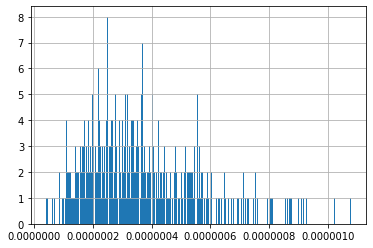

In [9]:
hist = agn['FLUX'].hist(bins=300)
plt.plot(hist)

In [11]:
agn['FLUX'] = pd.to_numeric(agn['FLUX'], errors='coerce')
agn.head()

,FLUX
MJD,
54687.650035,2.936060e-07
54697.650035,2.990764e-07
54707.650035,3.131870e-07
54717.650035,2.844194e-07
54727.650035,2.098870e-07


TypeError: float() argument must be a string or a number, not 'AxesSubplot'

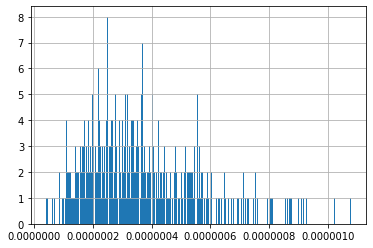

In [16]:
hist = agn['FLUX'].hist(bins=300)
plt.plot(hist)

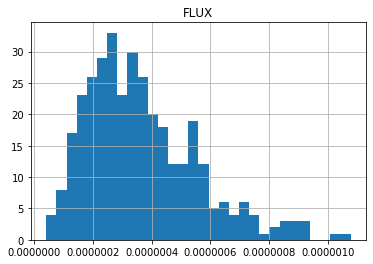

In [13]:

h= agn.hist(bins=30)


In [24]:
s = agn.std()
print ('STD= ',s)
m = agn.mean()
print(m)

STD=  FLUX    1.905036e-07
dtype: float64
FLUX    3.662681e-07
dtype: float64


from scipy.stats import norm
h.norm()
